<a href="https://colab.research.google.com/github/HasnainTariq1/PRODIGY_ML_03/blob/main/SVM_Cats_vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random


In [ ]:
# Import necessary libraries for file handling
from google.colab import files

# Upload Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Set the Kaggle configuration directory environment variable
os.environ['KAGGLE_CONFIG_DIR']= '/content'

In [ ]:
# Download the dogs-vs-cats competition dataset from Kaggle
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:04<00:00, 207MB/s]
100% 812M/812M [00:04<00:00, 207MB/s]


In [2]:
# Unzip the downloaded datasets
!unzip dogs-vs-cats.zip
!unzip train.zip

Archive:  dogs-vs-cats.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  train.zip
replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [34]:
# Define the paths to your datasets
train_dir = '/content/train'

# Check if the training and test directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"The specified training path does not exist: {train_dir}")


# Function to load images and labels from a specified folder
def load_images_from_folder(path):

  images=[] # List to store loaded images
  labels=[] # List to store corresponding labels


 # Iterate through each file in the specified folder
  for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))  # Read the image file

    if img is not None:
      img = cv2.resize(img,(64,64)) # Resize to a standard size
      images.append(img) # Append the resized image to the list

      label= filename.split('.')[0]  # Get label from filename
      labels.append(label) # Append the label to the list

  if not labels:
        raise ValueError("No labels found. Please check the image files in the directory.")

  return np.array(images),np.array(labels)

In [36]:
# Function to reduce the dataset size
def reduce_dataset(images, labels, sample_size):
    # Zip the images and labels together and select a random sample of the given size
    combined = list(zip(images, labels))
    reduced_sample = random.sample(combined, sample_size)

    # Unzip the images and labels back into separate lists
    reduced_images, reduced_labels = zip(*reduced_sample)

    return np.array(reduced_images), np.array(reduced_labels)

In [37]:
# Load training images and labels
train_images, train_labels=load_images_from_folder(train_dir)

In [39]:
# Reduce the dataset to, for example, 5000 samples
sample_size = 10000
reduced_train_images, reduced_train_labels = reduce_dataset(train_images, train_labels, sample_size)

In [40]:
# Convert categorical labels (e.g., 'cat', 'dog') to numeric labels
label_encoder=LabelEncoder()
train_labels_encoded= label_encoder.fit_transform(reduced_train_labels)# Encode labels as numbers


# Flatten the images
n_samples = len(reduced_train_images)
train_images_flattened= reduced_train_images.reshape(n_samples,-1)

# Split the data into training and testing sets  80% train, 20% test
X_train, X_test, Y_train, Y_test=train_test_split(train_images_flattened,train_labels_encoded,test_size= 0.2, random_state=45)


# Print shapes to verify the split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", Y_train.shape)
print("Testing labels shape:", Y_test.shape)


Training data shape: (8000, 12288)
Testing data shape: (2000, 12288)
Training labels shape: (8000,)
Testing labels shape: (2000,)


In [42]:
# convert the data type of the images to float32
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')


# Normalize the pixel values to a range between 0 and 1 # Zero is for black  #1 is for White


X_train /=255
X_test /=255

In [43]:
# Initialize the SVM classifier
svm_classifier=svm.SVC(kernel='linear')


# Train the SVM
svm_classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [44]:
# Predict on the test set
y_pred= svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.5765


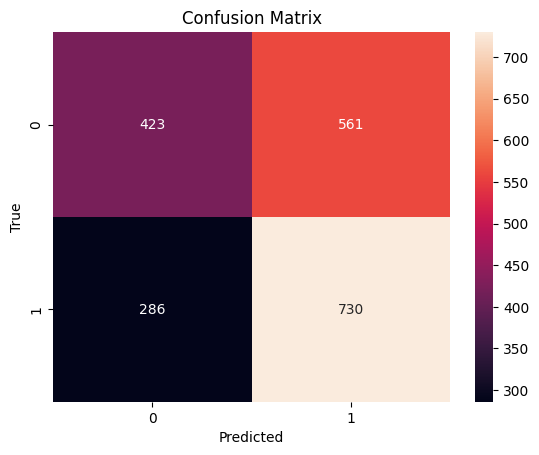

In [45]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()